In [2]:
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes

In [4]:
df = pd.read_csv('../datasets/breast_cancer_wisconsin.csv', index_col='id').sort_index()
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
8915,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,...,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834
85715,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,...,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911157302,M,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,...,25.68,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425
911296201,M,17.08,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.06431,0.1793,...,22.96,34.49,152.10,1648.0,0.16000,0.2444,0.2639,0.15550,0.3010,0.09060
911296202,M,27.42,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,0.2061,...,36.04,31.37,251.20,4254.0,0.13570,0.4256,0.6833,0.26250,0.2641,0.07427


In [5]:
# X - Features
X = df.iloc[:,1:]
# y - labels
y = df['diagnosis']

In [6]:
modelos = {}

modelos['DT']     = tree.DecisionTreeClassifier()
modelos['SVM']    = svm.SVC()
modelos['KNN']    = neighbors.KNeighborsClassifier()
modelos['LogReg'] = linear_model.LogisticRegression(multi_class='multinomial',solver='newton-cg')
modelos['NB']     = naive_bayes.GaussianNB()
modelos['SGD']    = linear_model.SGDClassifier()
modelos['RF']     = ensemble.RandomForestClassifier()
modelos['GB']     = ensemble.GradientBoostingClassifier()

In [7]:
df_result = pd.DataFrame(index=['DT','SVM','KNN','LogReg','NB','SGD','RF','GB'])
df_result

""
DT
SVM
KNN
LogReg
NB
SGD
RF
GB


### Treino (60%) e Teste (40%) - randomizado, mas não estratificado


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60/100, random_state=42, stratify=None)

In [9]:
algs = []
resultados_train = []
resultados_test = []

for modelo_key in modelos:
  modelo = modelos[modelo_key]
  modelo.fit(X_train, y_train)
  y_pred_train   = modelo.predict(X_train)
  y_pred_test    = modelo.predict(X_test)
  acuracia_train = metrics.accuracy_score(y_train, y_pred_train)
  acuracia_test  = metrics.accuracy_score(y_test, y_pred_test)
  algs.append(modelo_key)
  resultados_train.append(round(acuracia_train, 2))
  resultados_test.append(round(acuracia_test, 2))

df_result['acc_train_60'] = resultados_train
df_result['acc_test_60'] = resultados_test

### Treino (60%) e Teste (40%) - randomizado e estratificado

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60/100, random_state=42, stratify=y)

In [11]:
algs = []
resultados_train = []
resultados_test = []

for modelo_key in modelos:
  modelo = modelos[modelo_key]
  modelo.fit(X_train, y_train)
  y_pred_train   = modelo.predict(X_train)
  y_pred_test    = modelo.predict(X_test)
  acuracia_train = metrics.accuracy_score(y_train, y_pred_train)
  acuracia_test  = metrics.accuracy_score(y_test, y_pred_test)
  algs.append(modelo_key)
  resultados_train.append(round(acuracia_train, 2))
  resultados_test.append(round(acuracia_test, 2))

df_result['acc_train_60_estratificado'] = resultados_train
df_result['acc_test_60_estratificado'] = resultados_test

### Treino (80%) e Teste (20%) - randomizado, mas não estratificado

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=80/100, random_state=42, stratify=None)

In [13]:
algs = []
resultados_train = []
resultados_test = []

for modelo_key in modelos:
  modelo = modelos[modelo_key]
  modelo.fit(X_train, y_train)
  y_pred_train   = modelo.predict(X_train)
  y_pred_test    = modelo.predict(X_test)
  acuracia_train = metrics.accuracy_score(y_train, y_pred_train)
  acuracia_test  = metrics.accuracy_score(y_test, y_pred_test)
  algs.append(modelo_key)
  resultados_train.append(round(acuracia_train, 2))
  resultados_test.append(round(acuracia_test, 2))

df_result['acc_train_80'] = resultados_train
df_result['acc_test_80'] = resultados_test

### Treino (80%) e Teste (20%) - randomizado e estratificado

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=80/100, random_state=42, stratify=y)

In [15]:
algs = []
resultados_train = []
resultados_test = []

for modelo_key in modelos:
  modelo = modelos[modelo_key]
  modelo.fit(X_train, y_train)
  y_pred_train   = modelo.predict(X_train)
  y_pred_test    = modelo.predict(X_test)
  acuracia_train = metrics.accuracy_score(y_train, y_pred_train)
  acuracia_test  = metrics.accuracy_score(y_test, y_pred_test)
  algs.append(modelo_key)
  resultados_train.append(round(acuracia_train, 2))
  resultados_test.append(round(acuracia_test, 2))

df_result['acc_train_80_estratificado'] = resultados_train
df_result['acc_test_80_estratificado'] = resultados_test

## Analisando os dados

In [16]:
df_result

,acc_train_60,acc_test_60,acc_train_60_estratificado,acc_test_60_estratificado,acc_train_80,acc_test_80,acc_train_80_estratificado,acc_test_80_estratificado
DT,1.00,0.92,1.00,0.89,1.00,0.93,1.00,0.91
SVM,0.91,0.92,0.91,0.93,0.91,0.96,0.92,0.91
KNN,0.95,0.93,0.95,0.93,0.94,0.92,0.95,0.91
LogReg,0.96,0.94,0.97,0.94,0.95,0.98,0.97,0.95
NB,0.94,0.93,0.94,0.94,0.94,0.93,0.95,0.93
SGD,0.92,0.86,0.92,0.92,0.92,0.94,0.92,0.91
RF,1.00,0.93,1.00,0.97,1.00,0.94,1.00,0.96
GB,1.00,0.94,1.00,0.95,1.00,0.95,1.00,0.96


In [17]:
df_result.describe()

,acc_train_60,acc_test_60,acc_train_60_estratificado,acc_test_60_estratificado,acc_train_80,acc_test_80,acc_train_80_estratificado,acc_test_80_estratificado
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000
mean,0.960000,0.921250,0.961250,0.933750,0.957500,0.943750,0.96375,0.930000
std,0.036645,0.025877,0.036815,0.023261,0.037321,0.019226,0.03420,0.023299
min,0.910000,0.860000,0.910000,0.890000,0.910000,0.920000,0.92000,0.910000
25%,0.935000,0.920000,0.935000,0.927500,0.935000,0.930000,0.94250,0.910000
50%,0.955000,0.930000,0.960000,0.935000,0.945000,0.940000,0.96000,0.920000
75%,1.000000,0.932500,1.000000,0.942500,1.000000,0.952500,1.00000,0.952500
max,1.000000,0.940000,1.000000,0.970000,1.000000,0.980000,1.00000,0.960000


<AxesSubplot:>

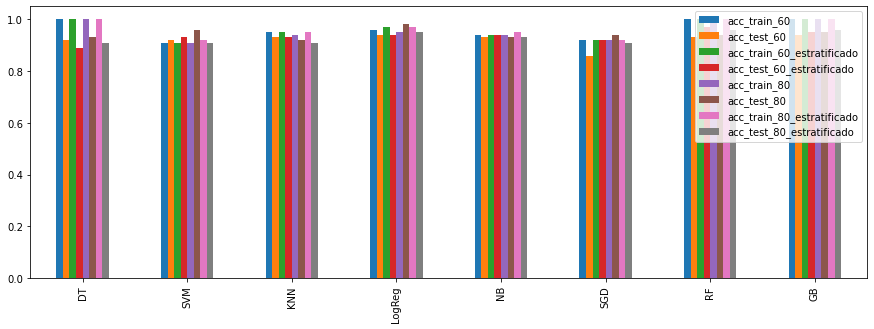

In [18]:
df_result.plot(kind='bar', figsize=(15,5))

In [22]:
for alg in df_result.T:
  print(f'{alg:>7}: {df_result.loc[alg,:].idxmax():^30} {df_result.loc[alg,:].max()}')

     DT:          acc_train_60          1.0
    SVM:          acc_test_80           0.96
    KNN:          acc_train_60          0.95
 LogReg:          acc_test_80           0.98
     NB:   acc_train_80_estratificado   0.95
    SGD:          acc_test_80           0.94
     RF:          acc_train_60          1.0
     GB:          acc_train_60          1.0


In [23]:
for col in df_result:
  print(f'{col:>30}: {df_result[col].idxmax():^7} {df_result[col].max()}')

                  acc_train_60:   DT    1.0
                   acc_test_60: LogReg  0.94
    acc_train_60_estratificado:   DT    1.0
     acc_test_60_estratificado:   RF    0.97
                  acc_train_80:   DT    1.0
                   acc_test_80: LogReg  0.98
    acc_train_80_estratificado:   DT    1.0
     acc_test_80_estratificado:   RF    0.96
